In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes # 데이터셋 불러오기

In [0]:
ds1 = load_diabetes()

# dataset의 형태(shape) 확인하기
print(ds1.data.shape, ds1.target.shape)

(442, 10) (442,)


In [0]:
# 데이터셋의 형태가 442 행 10열로 이루어져 있으며, 타겟의 형태가 442개 행으로만 나와있다.
ds1.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [0]:
ds2 = pd.DataFrame(ds1.data) # sklearn의 데이터셋을 pandas로도 해석이 가능합니다. ㅎㅎ

ds2.head()

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [0]:
ds1.target[:3] # target 데이터는 각 샘플 데이터와 대응된다.

array([151.,  75., 141.])

In [0]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'y = target')

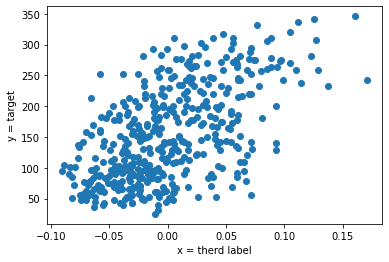

In [0]:
plt.scatter(ds1.data[:,2], ds1.target) # 세 번째 레이블과 타겟
plt.xlabel('x = therd label')
plt.ylabel('y = target')

In [0]:
# 훈련 데이터 준비하기
x_data = ds1.data[:,2]
y_data = ds1.target

In [0]:
# 선형회귀 시작하기전 준비
# 가중치와 바이어스를 초기화 (임의로 1.0으로 초기화한 것)
w = 1.0
b = 1.0 

In [0]:
# 훈련 데이터와 첫 셈플 데이터 y 를 얻기
y_hat = x_data[0] * w +b
print(y_hat)

1.0616962065186886


In [0]:
# target과 예측데이터 비교
print(y_data[0])

151.0


##1.06과 151 사이 타겟값의 오차를 보정하기 위해서 w와 b를 각각 바꿔가며 결과를 봅시다.

In [0]:
# 오차 보정하기
w_inc = w + 0.1
y_hat_inc = x_data[0]*w_inc +b
print(y_hat_inc)

1.0678658271705574


In [0]:
# w에 대해 조정치에 대한 예상치의 변화에 대해서 계산
w_rate = (y_hat_inc - y_hat) / (w_inc - w) # y가 변한만큼 w의 변화량으로 나눠준것
print(w_rate)

0.061696206518688734


x[0]에 대한 w의 변화율이라고 할 수 있는데, 이는 결국 x[0]에 대응되는 값이라고 볼 수 있다. (w의 변화율과는 상관없는 수식이네요)



---
###그렇다면 변화율로 가중치를 업데이트하는 방법?

변화율이 양수이면 가중치의 변화율을 가중치에 더하면 y 예상값도 증가하기 때문에 그냥 더해주면 된다.
변화율이 음수이면 가중치의 변화율을 그냥 더해줘도(음수) y 예상값이 증가하기 때문에 (음의 기울기) 역시 그냥 더해주면 된다.!

w_new = w + w_rate


In [0]:
w_new = w + w_rate
print(w_new)

1.0616962065186888


### 변화율로 절편 업데이트 하기

In [0]:
# bias 에 0.1의 변화를 주는 경우
b_inc = b + 0.1
y_hat_inc = x_data[0] * w + b_inc
print(y_hat_inc)

# Bias 에 따른 변화율 구하기
b_rate = (y_hat_inc - y_hat)/(b_inc - b)
print(b_rate)

1.1616962065186887
1.0


바이어스를 업데이트 하기 위해서는 변화율이 1이므로 단순히 1만 더해주면 된다..?
1차 함수이기 때문에 절편이 1이 늘어나면 y도 1만큼 늘어나는것은 당연!

In [0]:
b_new = b +1
print(b_new)

2.0


예상치가 y값에 미치지 못하는 경우 더 큰폭으로 수정할 수 없다는 함정, 예상치가 target값보다 커지면 감소시키지 못하는 문제가 생긴다.

# 오차 역전파
예상값과 실제 target 값의 오차가 연이어 전파되며 수행되는 것

In [0]:
# 오차의 양을 변화율에 곱하는 방법으로 가중치 업데이트 해보기
err = y_data[0] - y_hat # 오차의 양
w_new = w + w_rate*err # 변화율에 오차의 양 곱하기 (x[0] * 오차)
b_new = b + 1*err # 오차의 양과 변화율의 곱이 반영된 경우
print(w_new, b_new)

10.250624555904514 150.9383037934813


In [0]:
# x[1]을 사용해서 오차 구하기
y_hat = x_data[1]*w_new + b_new
err = y_data[1] - y_hat
w_rate = x_data[1] # x[1]을 사용하기 위함

w_new = w_new + w_rate*err
b_new = b_new + 1*err
print(w_new, b_new)

14.132317616381767 75.52764127612664


In [0]:
# 모든 샘플에 대해서 반복하기
for x, y in zip(x_data, y_data): # zip 함수는 한 요소를 하나씩 꺼내준다.
    y_hat = x* w + b
    err = y- y_hat
    w_rate = x
    w = w + w_rate*err
    b = b + 1*err

print(w, b)

587.8654539985689 99.40935564531424


데이터셋을 잘 표현했는지 확인해보기?

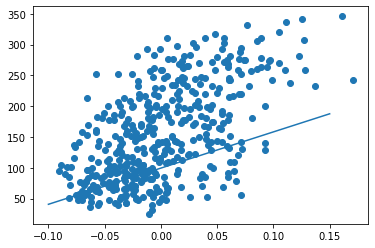

In [0]:
plt.scatter(x_data, y_data)
pt1 = (-0.1, -0.1*w + b) # 두 개의 점을 일단 만들어주기
pt2 = (0.15, 0.15*w+b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]])


# Epoch 반복하기

여러 번 학습을 반복하기

In [0]:
for i in range(1, 100):
    for x, y in zip(x_data, y_data):
        y_hat = x* w + b
        err = y- y_hat
        w_rate = x
        w = w + w_rate*err
        b = b + 1*err

print(w, b)

913.5973364345905 123.39414383177204


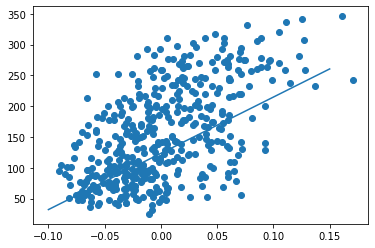

In [0]:
plt.scatter(x_data, y_data)
pt1 = (-0.1, -0.1*w + b) # 두 개의 점을 일단 만들어주기
pt2 = (0.15, 0.15*w+b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]])

이를 통해 전체적인 데이터를 알 수 있었다!
y = 913.6*x + 123.4

In [0]:
# 새로운 데이터 예측하기?
x_new = 0.18
y_pred = x_new * w + b
print(y_pred)

287.8416643899983
